In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from sklearn.model_selection import train_test_split
import random

In [3]:
# Define Paths
base_dir = 'data'

happy_dir = os.path.join(base_dir, 'Happy')
sad_dir = os.path.join(base_dir, "Sad")
angry_dir = os.path.join(base_dir, "Angry")

# Combine all image paths into a single list
image_files = []
for directory in [happy_dir, sad_dir, angry_dir]:
    image_files.extend([os.path.join(directory, f) 
    for f in os.listdir(directory) if f.endswith(('.jpg', '.png'))])

# Print the list of image files to verify
# print(image_files)

In [4]:
# Define augmentation techniques
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Function to visualize original and augmented images
def visualize_augmentations(image_path, datagen, num_augmentations=5):
    img = load_img(image_path)  # Load image
    x = img_to_array(img)  # Convert image to numpy array
    x = x.reshape((1,) + x.shape)  # Reshape image

    # Generate augmented images
    i = 0
    fig, ax = plt.subplots(1, num_augmentations + 1, figsize=(20, 20))
    ax[0].imshow(img)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    for batch in datagen.flow(x, batch_size=1):
        ax[i + 1].imshow(batch[0].astype('uint8'))
        ax[i + 1].set_title(f'Augmented Image {i + 1}')
        ax[i + 1].axis('off')
        i += 1
        if i >= num_augmentations:
            break

    plt.show()

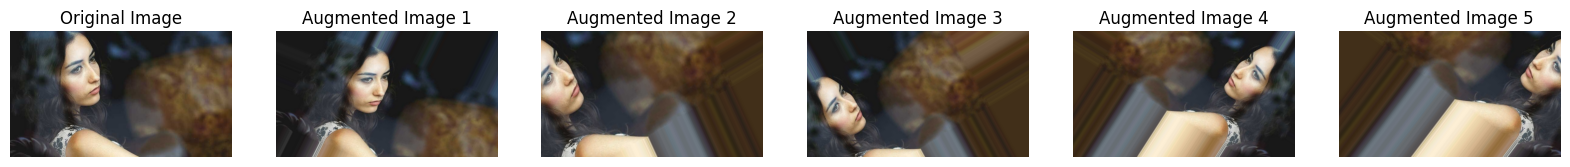

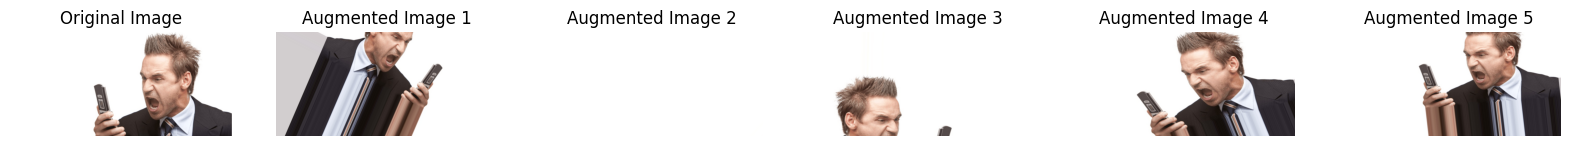

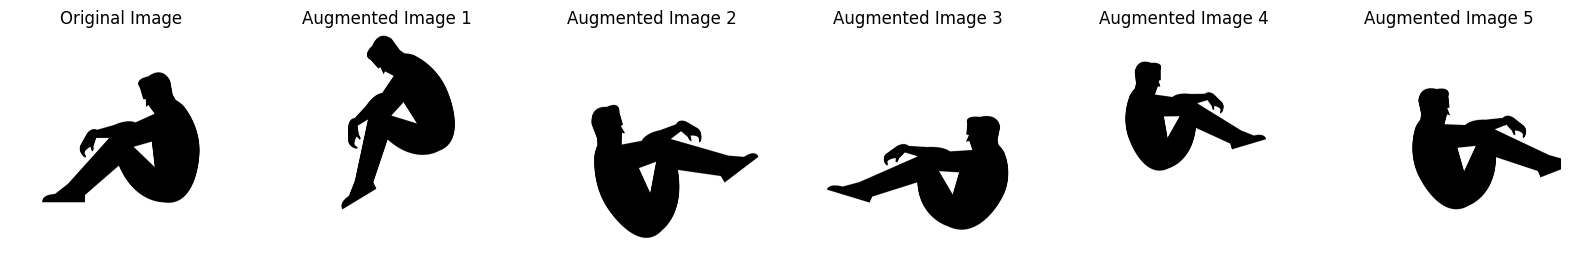

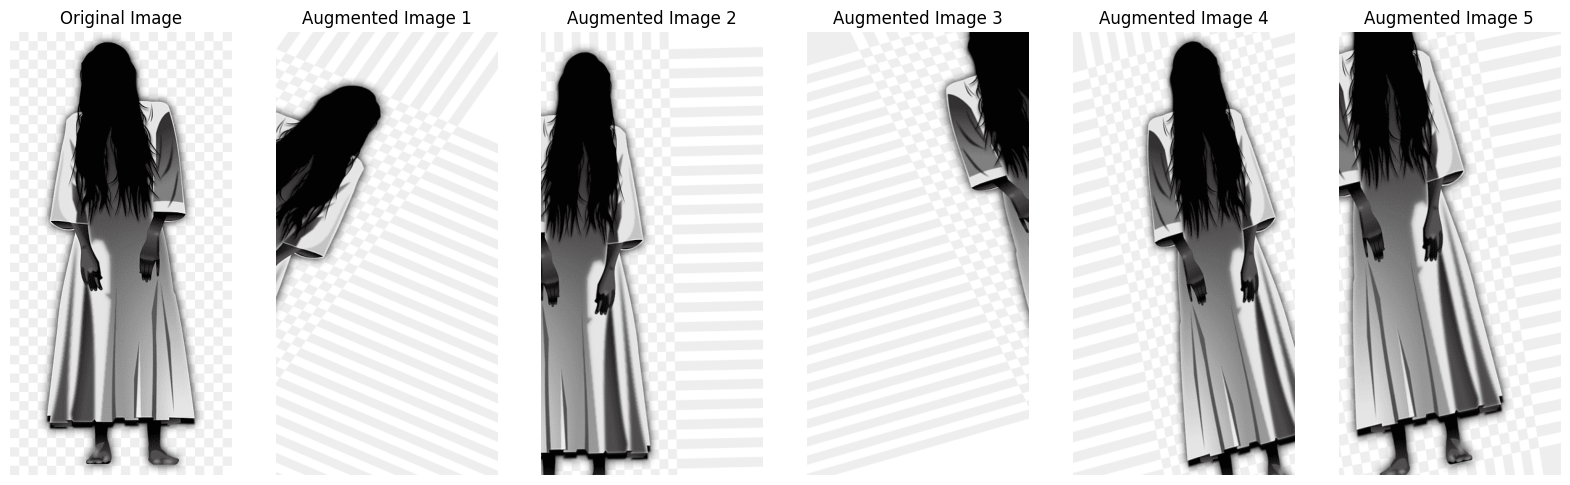

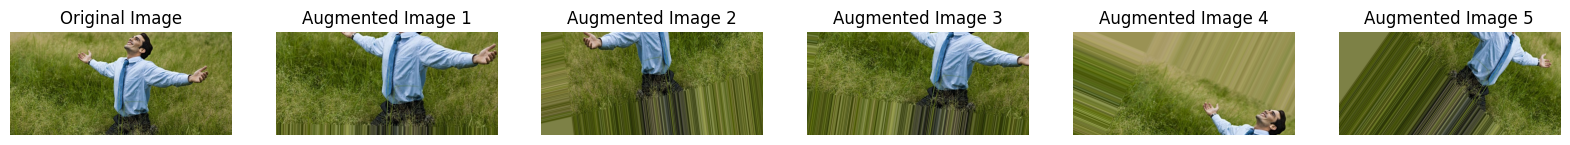

In [5]:
# Set a random seed for reproducibility
random.seed()

# Randomly select 5 images from the dataset
random_images = random.sample(image_files, 5)

# Visualize augmentations for each selected image
for image_path in random_images:
    visualize_augmentations(image_path, datagen)